In [1]:
%pip install ipykernel
%pip install opencv-python
%pip install keras
%pip install scikit-learn
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2024-06-16 08:27:16.791649: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 08:27:16.866582: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 08:27:17.121448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 08:27:18.293262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            if 'Dog' in folder:
                labels.append(1)
            elif 'Cat' in folder:
                labels.append(0)
    return images, labels

dogs_images, dogs_labels = load_images('Data/Dog')
cats_images, cats_labels = load_images('Data/Cat')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)

# One-hot encoding de las etiquetas
labels = to_categorical(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [5]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/10


2024-06-16 08:27:32.148516: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48168960 exceeds 10% of free system memory.
2024-06-16 08:27:33.445199: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-06-16 08:27:33.645635: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-06-16 08:27:34.303234: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-06-16 08:27:34.376987: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.6908 - loss: 37.4431 - val_accuracy: 0.9012 - val_loss: 14.1056
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.9658 - loss: 1.4704 - val_accuracy: 0.9506 - val_loss: 5.2460
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.9936 - loss: 0.0821 - val_accuracy: 0.9506 - val_loss: 3.4419
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9630 - val_loss: 3.5710
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9506 - val_loss: 3.8386
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9506 - val_loss: 3.9518
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9506 - val_loss: 3.9931
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 1.0000 - loss: 1.0536e-10 - val_accuracy: 0.9506 

In [6]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
target='imagenPerro.jpg'
img = cv2.imread(target)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
[[1.0000000e+00 3.0710958e-33]]


Gato


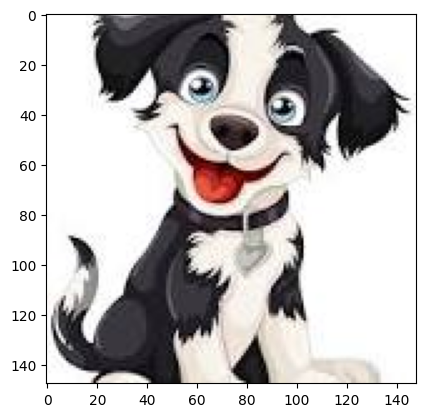

In [7]:
# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Gato')
else:
    print('Perro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread(target)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 